In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap


In [2]:

custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

cmap = ListedColormap(custom_colors)
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '-.' , ':']

noise_std_values = [0.1 , 0.3 , 0.5 , 0.7 ,1 , 2] 
corrupted_clients_counts = [3 , 4,6 , 8  , 9]

# FedFor HuGaDB: 350 samples per client

In [3]:
save_dir = "../results/c2fedfor_"

results = {noise: [] for noise in noise_std_values}

for noise in noise_std_values:
    for cc in corrupted_clients_counts:
        filename = f"Nash_Equilibrium_Details_noise_{noise}_c{cc}.csv"
        file_path = os.path.join(save_dir, filename)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)

            occurrence_count = (df['Combination'] == 1111111111 ).sum()
            results[noise].append(occurrence_count)
        else:
            print(f"File {file_path} does not exist.")
            results[noise].append(0)


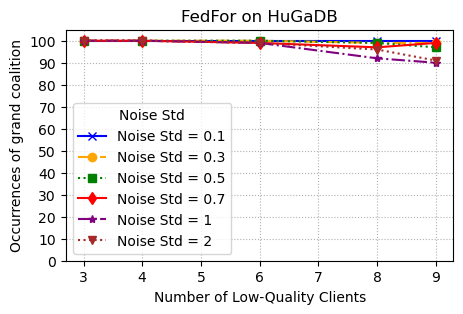

In [18]:
plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel("Number of Low-Quality Clients")
plt.ylabel("Occurrences of grand coalition")
plt.legend(title="Noise Std")
plt.title('FedFor on HuGaDB')
plt.grid(linestyle=':')
plt.savefig('../fig/fedfor_hugadb.pdf')
plt.show()

# FedLR HuGaDB: 350 samples per client

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt


save_dir = "../results/c2fedlr__2"


results = {noise: [] for noise in noise_std_values}


for noise in noise_std_values:
    for cc in corrupted_clients_counts:
        filename = f"Nash_Equilibrium_Details_noise_{noise}_c{cc}.csv"
        file_path = os.path.join(save_dir, filename)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)

            occurrence_count = (df['Combination'] == 1111111111 ).sum()
            results[noise].append(occurrence_count)
        else:
            print(f"File {file_path} does not exist.")
            results[noise].append(0)





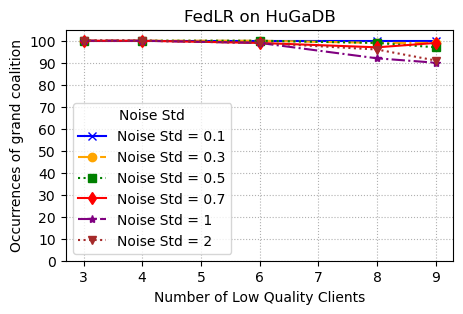

In [17]:
plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')

plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 105)
plt.xlabel("Number of Low Quality Clients")
plt.ylabel("Occurrences of grand coalition")
plt.legend(title="Noise Std")
plt.title('FedLR on HuGaDB')
plt.grid(linestyle=':')
plt.savefig('../fig/fedlr_hugadb.pdf')
plt.show()

# FedLR Spambase: 350 samples per client

In [7]:
df = pd.read_csv('../results/c1fedlr_/nash_occurrence_results.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

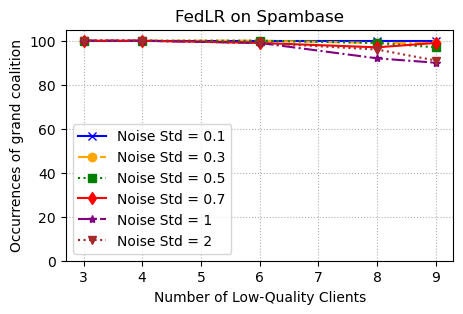

In [22]:
plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')
    
plt.yticks(np.arange(0, 101, 20))
plt.ylim(0, 105)
plt.xlabel('Number of Low-Quality Clients')
plt.ylabel('Occurrences of grand coalition')
plt.title('FedLR on Spambase')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('../fig/fedlr_spambase.pdf')
plt.show()

In [9]:
df = pd.read_csv('../results/c1fedfor_/nash_occurrence_results_run_experiment_2.csv', sep=',')
df = df.rename(columns={'Number of Bad Clients': 'num_bad_clients'})

results = df.set_index('num_bad_clients').to_dict(orient='list')
results = {float(k): v for k, v in results.items()}

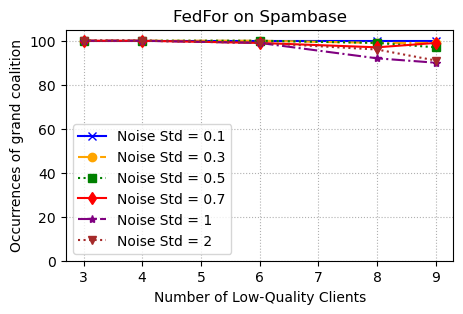

In [20]:
plt.figure(figsize=(5, 3))
for i, noise in enumerate(noise_std_values):
    color = cmap(i) 
    marker = markers[i % len(markers)]
    linestyle = linestyles[i % len(linestyles)]
    
    plt.plot(corrupted_clients_counts, results[noise],
             marker=marker, linestyle=linestyle, color=color,
             label=f'Noise Std = {noise}')
    
plt.yticks(np.arange(0, 101, 20))
plt.ylim(0, 105)
plt.xlabel('Number of Low-Quality Clients')
plt.ylabel('Occurrences of grand coalition')
plt.title('FedFor on Spambase')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('../fig/fedfor_spambase.pdf')
plt.show()